In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import csv
import os
import sys
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

56 workers and 1 cores, 1020.9 in 57.59 seconds
1 workers and 56 cores, 808.7 in 56.68 seconds
24 workers and 24 cores, 802.2 in 49.0 seconds
24 workers and 56 cores, 802.2 in 47.51 seconds
56 workers and 24 cores, 805.1 in 59.8 seconds


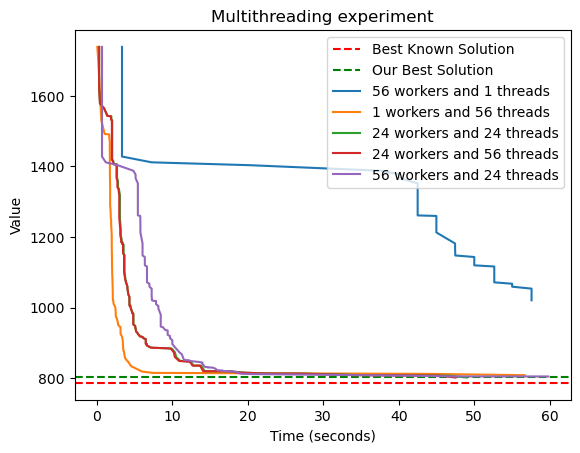

In [3]:
## Multithreading experiment

from integer_model import *

fnames = ["R109-56-56.json", "R109-56-1.json", "R109-24-24.json", "R109-24.json", "R109-56.json"]

instances = []
for fname in fnames:
    instance = Integer_model()
    instance.read_json(fname)
    instances.append(instance)

instance = instances[0]
instances.remove(instance)
for instancem in instances:
    instance.instance['solutions'].append(instancem.instance['solutions'][0])


# plt.yscale('log')
best = instance.instance['best_known_solution']['Distance']
if best != '':
    best_known_solution = float(best)
    plt.axhline(y=best_known_solution, color='r', linestyle='--', label='Best Known Solution')
if instance.instance['our_best_solution']:
    our_best_solution = 802.2
    plt.axhline(y=our_best_solution, color='g', linestyle='--', label='Our Best Solution')

for solution in instance.instance['solutions']:
    # print(solution['n_workers'])
    # print(solution['n_cores'])
    # print(solution['total_distance'])
    print(f'{solution["n_workers"]} workers and {solution["n_cores"]} cores, {solution["total_distance"]} in {solution["search_progress"][-1][1]} seconds')
    numbers = [entry[0] for entry in solution['search_progress']]
    times = [entry[1] for entry in solution['search_progress']]
    plt.plot(times, numbers, label=f'{solution["n_workers"]} workers and {solution["n_cores"]} threads')



# Plot the data

plt.ylabel('Value')
plt.xlabel('Time (seconds)')
plt.title('Multithreading experiment')
plt.legend(loc='upper right')

# plt.ylim(min(times), max(times + [best_known_solution]))

# Display the plot
plt.show()

In [16]:
# Define the folder path containing the JSON files

# Initialize an empty list to store the dataframes
dfs = []

# Iterate over the files in the folder

data_folder = '..\\..\\data\\VRPTW\\'  # Specify the folder name where the data files are located
# cvrptw_prob = CVRPTWProblem()

for folder_name in os.listdir(data_folder):
    if not os.path.isdir(os.path.join(data_folder, folder_name)):
        continue
    folder_path = os.path.join(data_folder, folder_name)
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            # Read the JSON file

            instance_name = filename.split('.')[0]
            file_path = os.path.join(folder_path, filename)
            with open(file_path) as f:
                data = json.load(f)

            # Extract the required data from the JSON
            name = filename[:-5]
            benchmark = data['name']
            N = data['N']
            best_known_solution = data['best_known_solution']
            our_best_solution = data['our_best_solution']
            # solutions = [
            #         [sol['solver'] if 'solver' in sol.keys() else 'Docplex, integer model', sol['n_workers'] if 'n_workers' in sol.keys() else 0, sol['total_distance'],
            #          sol['total_distance'],
            #          sol['search_progress'][-1][1] if 'search_progress' in sol.keys() else sol['time']]
            #         for sol in data['solutions']]
            solutions = { f'{sol["solver"] if "solver" in sol.keys() else "Docplex, integer model"}':
                    {'n_workers': sol['n_workers'] if 'n_workers' in sol.keys() else 0,
                     'total_distance': sol['total_distance'],
                     'time': sol['search_progress'][-1][1] if 'search_progress' in sol.keys() else sol['time']}
                    for sol in data['solutions']}

            print(solutions)

            horizon = instance_name[2] if instance_name[:2] == 'RC' else instance_name[1]

            # Create a DataFrame with the extracted data
            df = pd.DataFrame({
                'benchmark': [benchmark],
                'name': [name],
                'N': [N],
                'horizon': 'short' if horizon == '1' else 'long',
                'sampling': 'RC' if instance_name[:2] == 'RC' else instance_name[0],
                'best_known_dist': float(best_known_solution['Distance']) if best_known_solution is not None and best_known_solution['Distance'] != '' else -1,
                'our_best_dist': our_best_solution['total_distance'],
                'our_best_time': our_best_solution['search_progress'][-1][1],
                'diff': float(best_known_solution['Distance']) - our_best_solution['total_distance'] if best_known_solution is not None and best_known_solution['Distance'] != '' else None,
                'best_known_solution': [best_known_solution],
                'our_best_solution': [our_best_solution],
                'solutions': [solutions]
            })

            # df = df.assign(solutions=[solutions])

            # Append the DataFrame to the list
            dfs.append(df)
            # break

# Concatenate the list of DataFrames into a single DataFrame
result_df = pd.concat(dfs, ignore_index=True)

# Display the resulting DataFrame
print(result_df)


{'Docplex, integer model': {'n_workers': 28, 'total_distance': 827.3, 'time': 152.39}, 'OR-Tools': {'n_workers': 0, 'total_distance': 827.3, 'time': 157}, 'Docplex, interval model': {'n_workers': 28, 'total_distance': 827.3, 'time': 498.54}}
{'Docplex, integer model': {'n_workers': 28, 'total_distance': 827.3, 'time': 161.66}, 'OR-Tools': {'n_workers': 0, 'total_distance': 827.3, 'time': 166}, 'Docplex, interval model': {'n_workers': 28, 'total_distance': 1036.8, 'time': 743.48}}
{'Docplex, integer model': {'n_workers': 28, 'total_distance': 856.2, 'time': 860.1}, 'OR-Tools': {'n_workers': 0, 'total_distance': 843.1, 'time': 865}, 'Docplex, interval model': {'n_workers': 28, 'total_distance': 1026.3, 'time': 853.38}}
{'Docplex, integer model': {'n_workers': 28, 'total_distance': 847.4, 'time': 403.55}, 'OR-Tools': {'n_workers': 0, 'total_distance': 869.8, 'time': 408}, 'Docplex, interval model': {'n_workers': 28, 'total_distance': 1009.0, 'time': 571.25}}
{'Docplex, integer model': {'n

In [10]:
#save df

# result_df.to_csv('..\\..\\data\\VRPTW\\result_df.csv', index=False)
result_df.to_json('..\\..\\data\\VRPTW\\result_df.json', orient='records')


In [3]:
#load df

# result_df = pd.read_csv('..\\..\\data\\VRPTW\\result_df.csv') - converts arrays and dicts to strings
result_df = pd.read_json('..\\..\\data\\VRPTW\\result_df.json', orient='records')


In [38]:
# Sorting

result_df = result_df.sort_values(by=[ 'N', 'name',])

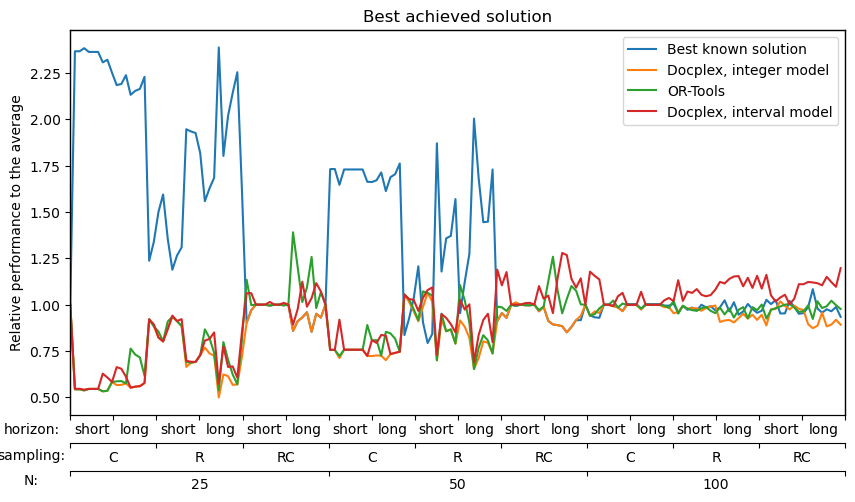

In [203]:
# Plot total distance from solutions

solutions = result_df.get(['N', 'horizon', 'sampling', 'solutions', 'best_known_dist'])

relative_dists = [] # relative time to best known solution

for index, row in solutions.iterrows():
    rel = [row['best_known_dist']]
    # rel = [] # Plot only local results
    for solver, solution in row['solutions'].items():
        rel.append(solution['total_distance'])
    reference = np.mean(rel)
    relative_dists.append(rel/reference)

relative_dists = np.array(relative_dists)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim([0, len(relative_dists)])

# plt.yscale('log')

# print(relative_dists[:, 0])
# plot relative times

ax.plot(range(len(relative_dists)), relative_dists[:, 0], label='Best known solution')
ax.plot(range(len(relative_dists)), relative_dists[:, 1], label='Docplex, integer model')
ax.plot(range(len(relative_dists)), relative_dists[:, 2], label='OR-Tools')
ax.plot(range(len(relative_dists)), relative_dists[:, 3], label='Docplex, interval model')
plt.ylabel('Relative performance to the average')
# plt.xlabel('Instance')
plt.title('Best achieved solution')
ax.legend()
ax.set_xticks([])

axis = []
keys = ['N', 'horizon', 'sampling']
horizons = result_df.get(keys)
ticss = []
for key in horizons.keys():
    list_key = horizons.get(key).tolist()

    last = list_key[0]
    ax_tics = [last]
    for i in range(1, len(list_key)):
        if list_key[i] != last:
            ax_tics.append(list_key[i])
            last = list_key[i]
    ticss.append(ax_tics)

# order tics by length reverse
tics_order = np.argsort([len(tics) for tics in ticss],)[::-1]
for i in tics_order:
    ax_tics = ticss[i]
    key = keys[i]
    if len(ax_tics) == len(result_df):
        continue

    ax_tics.append('')

    # tics = np.linspace(start=0, stop=len(result_df), num=len(ax_tics))

    axis.append(ax.twiny())
    newax = axis[-1]
    # newax.set_frame_on(True)
    # newax.patch.set_visible(False)
    newax.xaxis.set_ticks_position('bottom')
    newax.xaxis.set_label_position('bottom')
    xoffset = 20 * (len(axis) - 1)
    newax.spines['bottom'].set_position(('outward', xoffset))
    newax.set_xlabel(key + ':')
    newax.xaxis.set_label_coords(-0.05, -(xoffset/300) - 0.02)

    atics = np.linspace(start=0, stop=len(result_df), num=len(ax_tics))
    newax.set_xticks(atics, labels=ax_tics, )
    ax_tics=ax_tics[:-1]
    tics = np.linspace(start=0, stop=len(result_df), num=(len(ax_tics)*2)+1)
    tics = tics[1::2]
    newax.set_xticks(tics, labels=ax_tics, minor=True)
    newax.xaxis.set_major_formatter(ticker.NullFormatter())
    newax.tick_params(axis='x', which='minor', tick1On=False, tick2On=False)
    # for label in newax.get_xticklabels():
    #     label.set_horizontalalignment('center')

plt.show()


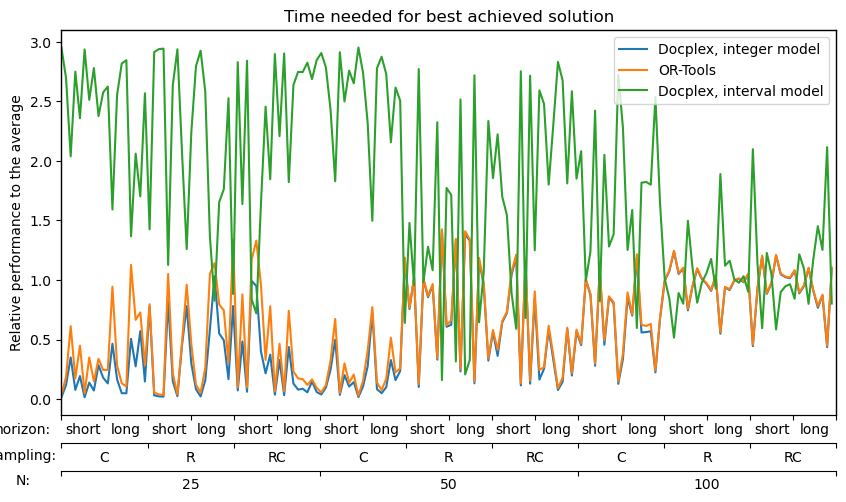

In [202]:
# Plot total time from solutions

solutions = result_df.get(['N', 'horizon', 'sampling', 'solutions', 'best_known_dist'])

relative_dists = [] # relative time to best known solution

for index, row in solutions.iterrows():
    rel = [] # Plot only local results
    for solver, solution in row['solutions'].items():
        rel.append(solution['time'])
    reference = np.mean(rel)
    relative_dists.append(rel/reference)

relative_dists = np.array(relative_dists)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim([0, len(relative_dists)])

# plt.yscale('log')

# print(relative_dists[:, 0])
# plot relative times

ax.plot(range(len(relative_dists)), relative_dists[:, 0], label='Docplex, integer model')
ax.plot(range(len(relative_dists)), relative_dists[:, 1], label='OR-Tools')
ax.plot(range(len(relative_dists)), relative_dists[:, 2], label='Docplex, interval model')
plt.ylabel('Relative performance to the average')
# plt.xlabel('Instance')
plt.title('Time needed for best achieved solution')
ax.legend()
ax.set_xticks([])

axis = []
keys = ['N', 'horizon', 'sampling']
horizons = result_df.get(keys)
ticss = []
for key in horizons.keys():
    list_key = horizons.get(key).tolist()

    last = list_key[0]
    ax_tics = [last]
    for i in range(1, len(list_key)):
        if list_key[i] != last:
            ax_tics.append(list_key[i])
            last = list_key[i]
    ticss.append(ax_tics)

# order tics by length reverse
tics_order = np.argsort([len(tics) for tics in ticss],)[::-1]
for i in tics_order:
    ax_tics = ticss[i]
    key = keys[i]
    if len(ax_tics) == len(result_df):
        continue

    ax_tics.append('')

    # tics = np.linspace(start=0, stop=len(result_df), num=len(ax_tics))

    axis.append(ax.twiny())
    newax = axis[-1]
    # newax.set_frame_on(True)
    # newax.patch.set_visible(False)
    newax.xaxis.set_ticks_position('bottom')
    newax.xaxis.set_label_position('bottom')
    xoffset = 20 * (len(axis) - 1)
    newax.spines['bottom'].set_position(('outward', xoffset))
    newax.set_xlabel(key + ':')
    newax.xaxis.set_label_coords(-0.05, -(xoffset/300) - 0.02)

    atics = np.linspace(start=0, stop=len(result_df), num=len(ax_tics))
    newax.set_xticks(atics, labels=ax_tics, )
    ax_tics=ax_tics[:-1]
    tics = np.linspace(start=0, stop=len(result_df), num=(len(ax_tics)*2)+1)
    tics = tics[1::2]
    newax.set_xticks(tics, labels=ax_tics, minor=True)
    newax.xaxis.set_major_formatter(ticker.NullFormatter())
    newax.tick_params(axis='x', which='minor', tick1On=False, tick2On=False)
    # for label in newax.get_xticklabels():
    #     label.set_horizontalalignment('center')

plt.show()
